In [2]:
import os
import tqdm
import random
import pathlib
import itertools
import collections
import pandas as pd

import cv2
import einops
import numpy as np
import remotezip as rz
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
pathToCVSData = '/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/dataSetCSV'

In [10]:
data = []

for folder in sorted(os.listdir(pathToCVSData)):
    if (not folder.startswith(".")) and os.path.isdir(os.path.join(pathToCVSData, folder)):
        pathToFolder = os.path.join(pathToCVSData, folder)
        for subfolder in sorted(os.listdir(pathToFolder)):
            if (not subfolder.startswith(".")) and os.path.isdir(os.path.join(pathToFolder, subfolder)):
                pathToSubFolder = os.path.join(pathToFolder, subfolder)
                for file in sorted(os.listdir(pathToSubFolder)):
                        if not file.startswith("."):
                            strokeData = pd.read_csv(os.path.join(pathToSubFolder, file), delimiter=';', decimal='.')
                            lenght = len(strokeData)
                            data.append(strokeData)

In [11]:
data

[     box_conf   box_x  box_y  box_w  box_h   box_x_n   box_y_n   box_w_n  \
 0    0.932318  1340.5  485.5  357.0  699.0  0.698177  0.449537  0.185938   
 1    0.934119  1344.5  487.0  359.0  698.0  0.700260  0.450926  0.186979   
 2    0.935205  1348.5  487.5  357.0  697.0  0.702344  0.451389  0.185938   
 3    0.936281  1352.0  488.5  360.0  697.0  0.704167  0.452315  0.187500   
 4    0.936170  1357.0  489.5  356.0  695.0  0.706771  0.453241  0.185417   
 ..        ...     ...    ...    ...    ...       ...       ...       ...   
 166  0.949403  1453.5  483.5  399.0  809.0  0.757031  0.447685  0.207813   
 167  0.948812  1453.5  483.0  397.0  804.0  0.757031  0.447222  0.206771   
 168  0.948281  1454.5  482.5  395.0  799.0  0.757552  0.446759  0.205729   
 169  0.948510  1454.5  482.0  395.0  796.0  0.757552  0.446296  0.205729   
 170  0.949216  1454.5  481.5  395.0  793.0  0.757552  0.445833  0.205729   
 
       box_h_n        1_x  ...       16_x       16_y   16_conf    16_x_n  

In [35]:
moyH = []
moyW = []
for d in data:
    moyH.append(d['box_h'].mean())
    moyW.append(d['box_w'].mean())

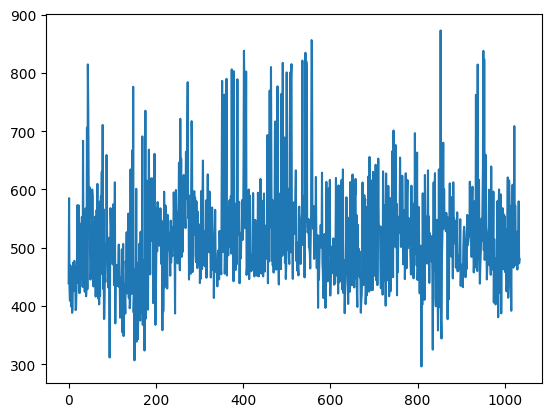

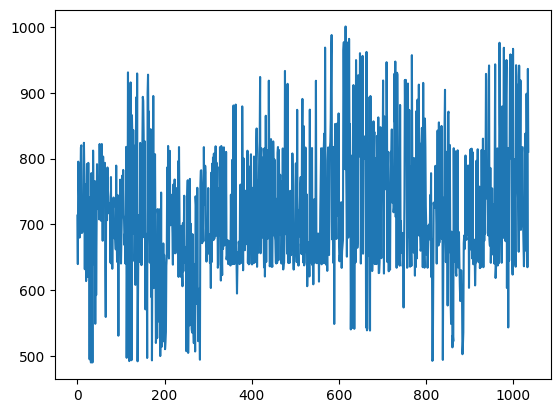

In [37]:
plt.plot(moyW)
plt.show()
plt.plot(moyH)

In [40]:
moyX = []
moyY = []
for d in data:
    moyX.append(d['box_x'].max() - d['box_x'].min())
    moyY.append(d['box_y'].mean())

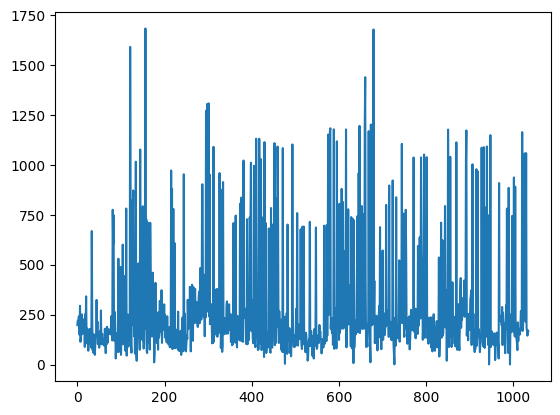

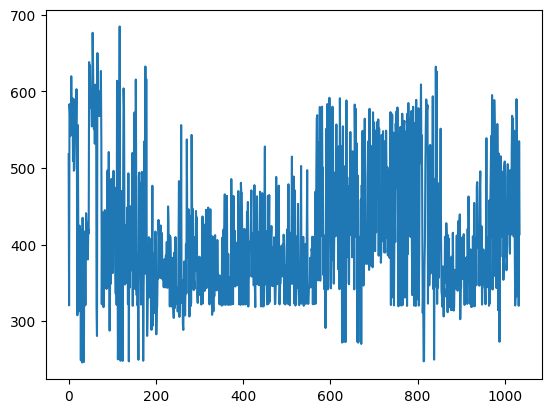

In [41]:
plt.plot(moyX)
plt.show()
plt.plot(moyY)